<a href="https://colab.research.google.com/github/JasmineJames25/Machine-Learning-Projects/blob/main/predicting_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING INCOME LEVELS  : CLASSIFICATION ANALYSIS**

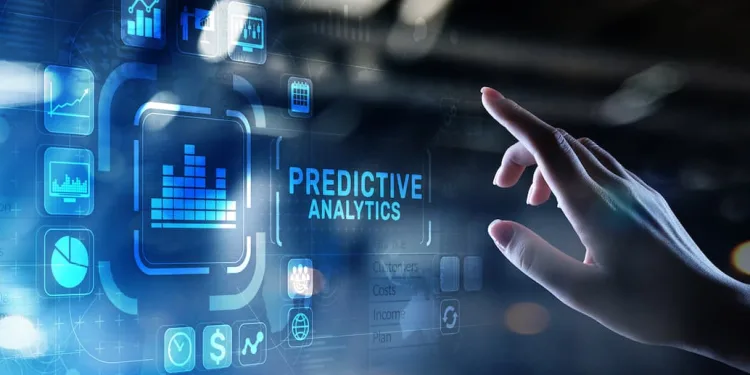

#ABOUT THE DATASET
The dataset provided to us contains 32560 rows, and 14 different independent features. We
aim to predict if a person earns more than 50k$ per year or not. Since the data predicts 2
values (>50K or <=50K), this clearly is a classification problem, and we will train the
classification models to predict the desired outputs.
Mentioned below are the details of the features provided to us, which we will be feeding to our
classification model to train it.
1. Age — The age of an individual, this ranges from 17 to 90.
2. Workclass — The class of work to which an individual belongs.
3. Fnlwgt — The weight assigned to the combination of features (an estimate of how many
people belong to this set of combination)
4. Education — Highest level of education
5. Education_num — Number of years for which education was taken
6. Marital_Status — Represents the category assigned on the basis of marriage status of a
person
7. Occupation — Profession of a person
8. Relationship — Relation of the person in his family
9. Race — Origin background of a person
10. Sex — Gender of a person
11. Capital_gain — Capital gained by a person
12.Capital_loss — Loss of capital for a person
13. Hours_per_week — Number of hours for which an individual works per week
14. Native_Country — Country to which a person belongs

   *Output:*
  
   Income — The target variable, which predicts if the income is higher or lower than 50K$

###IMPORTING SUFFICIENT PYTHON LIBRARIES AND IMPORTING THE DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/census.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#To check the missing values
df.isna().sum()
#no missing values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
#check duplicate values in dataset
df.duplicated().sum()

52

In [ ]:
#remove duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#to determine unique values
for i in df.columns:
  print(i,":\n",df[i].unique())

age :
 [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass :
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt :
 [226802  89814 336951 ... 129912 255835 257302]
education :
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
education-num :
 [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status :
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation :
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-hous

###we observe that in 'workclass','occupaton' and 'native-country' has '?' means None

###VISUALIZING EACH COLUMN TO MAKE FILL IN THE CORRECT VALUE

In [ ]:
#count of 'workclass','occupation','native-country'
print(df['workclass'].value_counts,('\n'))
print(df['occupation'].value_counts,('\n'))
print(df['native-country'].value_counts,('\n'))

<bound method IndexOpsMixin.value_counts of 0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48790, dtype: object> 

<bound method IndexOpsMixin.value_counts of 0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48790, dtype: object> 

<bound method IndexOpsMixin.value_counts of 0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States


In [ ]:
#To determine the sum of unique value (' ?')
df.isin(['?']).sum()

age                  0
workclass         2795
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

In [ ]:
df['workclass']= df['workclass'].replace('?',np.nan)
df['occupation']= df['occupation'].replace('?',np.nan)
df['native-country']= df['native-country'].replace('?',np.nan)

In [ ]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
#count of income (output)
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

Here we can say that the given data is imbalanced

In [ ]:
#collect string columns
categorical_clm =[]
for i in df.columns:
  if df[i].dtype=='object':
    categorical_clm.append(i)
categorical_clm

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [ ]:
#relation between input and output data
df.corr()

<ipython-input-148-2b15f50921e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076451,0.030635,0.077185,0.056838,0.071223
fnlwgt,-0.076451,1.000000,-0.038727,-0.003715,-0.004378,-0.013521
education-num,0.030635,-0.038727,1.000000,0.125219,0.080986,0.143915
capital-gain,0.077185,-0.003715,0.125219,1.000000,-0.031475,0.082152
capital-loss,0.056838,-0.004378,0.080986,-0.031475,1.000000,0.054431
hours-per-week,0.071223,-0.013521,0.143915,0.082152,0.054431,1.000000


In [ ]:
#function for ploting the distribution of categorical vaiables
def plot_cat(df,col,x_label,y_label,plot_title):
  sns.set_style('darkgrid')
  plt.figure(figsize=(14,6))
  sns.countplot(data=df,x=col,color='red',hue='income',palette='nipy_spectral')
  sns.countplot(data=df,x=col,color='red',hue='income',palette='nipy_spectral')
  plt.xticks(rotation=45)
  plt.title(plot_title,fontsize=14)
  plt.xlabel(x_label,fontsize=12)
  plt.ylabel(y_label,fontsize=12)
  #plt.show()

In [ ]:
#workclass based analysis
df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

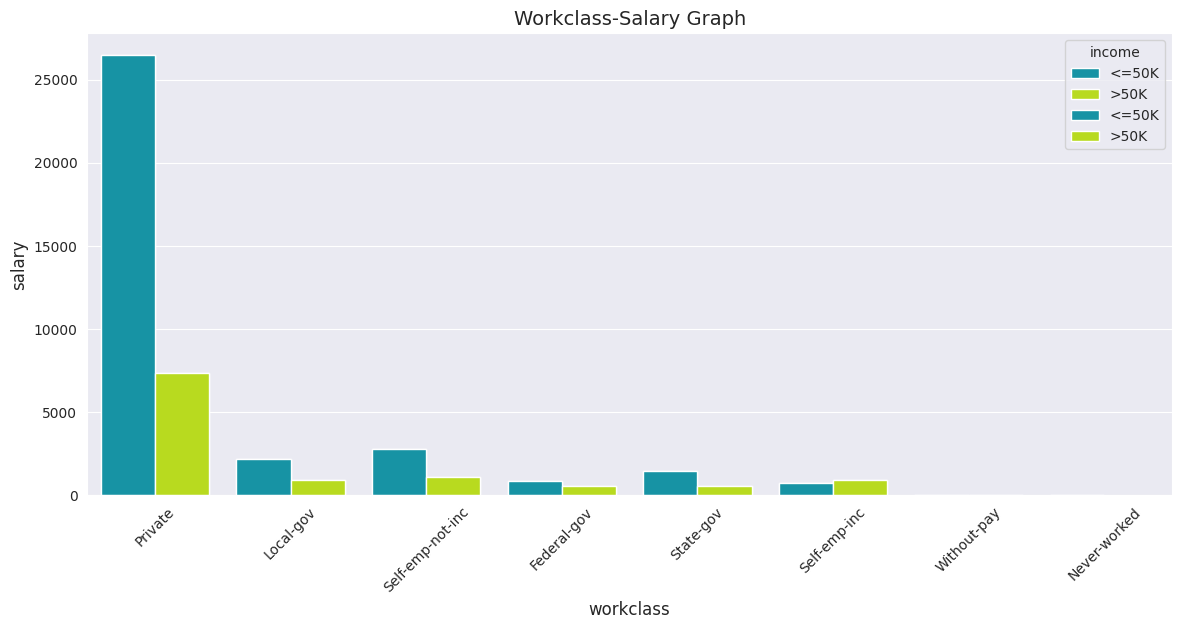

In [ ]:
plot_cat(df,'workclass','workclass','salary','Workclass-Salary Graph')


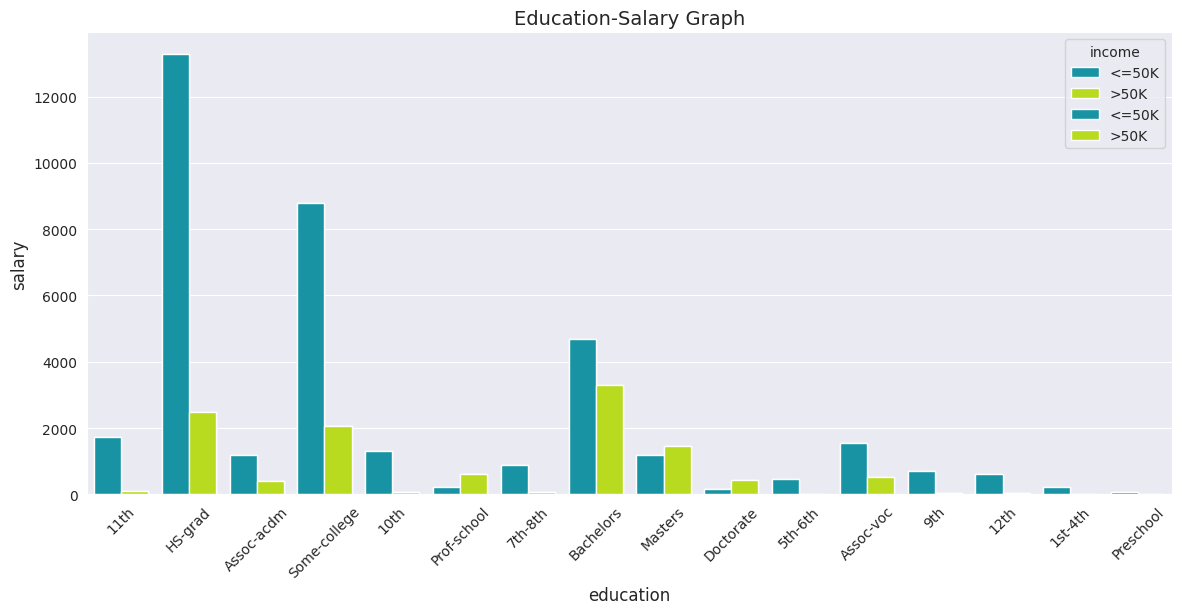

In [ ]:
#education based analysis
df['education'].value_counts()
plot_cat(df,'education','education','salary','Education-Salary Graph')

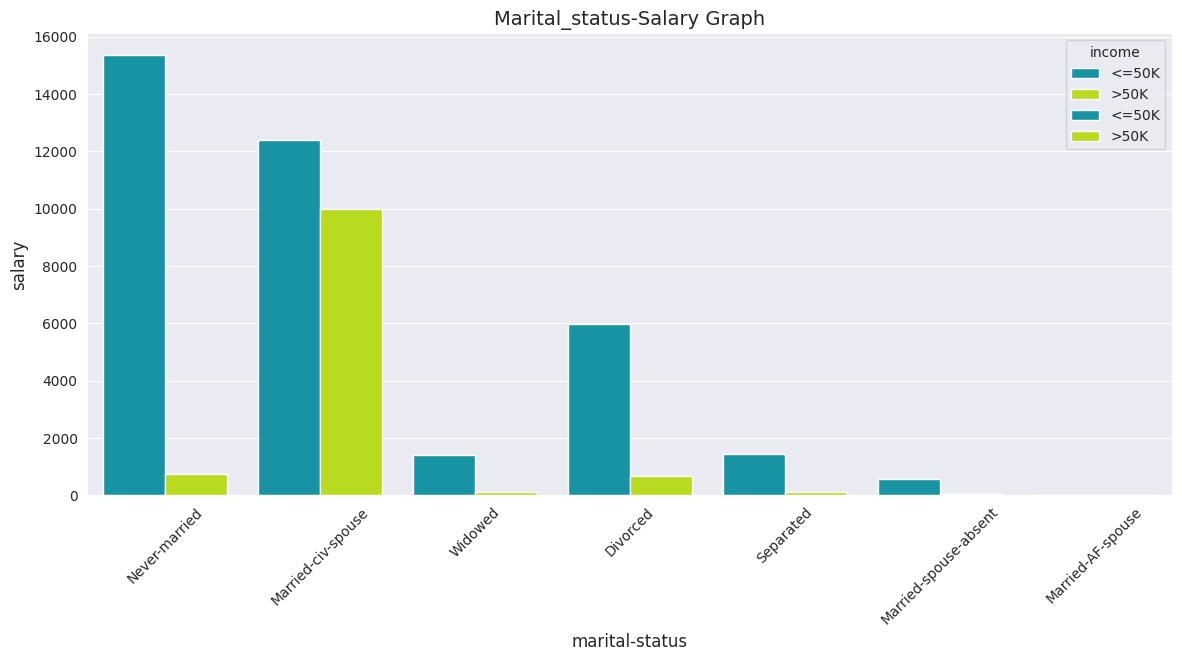

In [ ]:
#marital-status based analysis
df['marital-status'].value_counts()
plot_cat(df,'marital-status','marital-status','salary','Marital_status-Salary Graph')

In [ ]:
#occupation based analysis
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

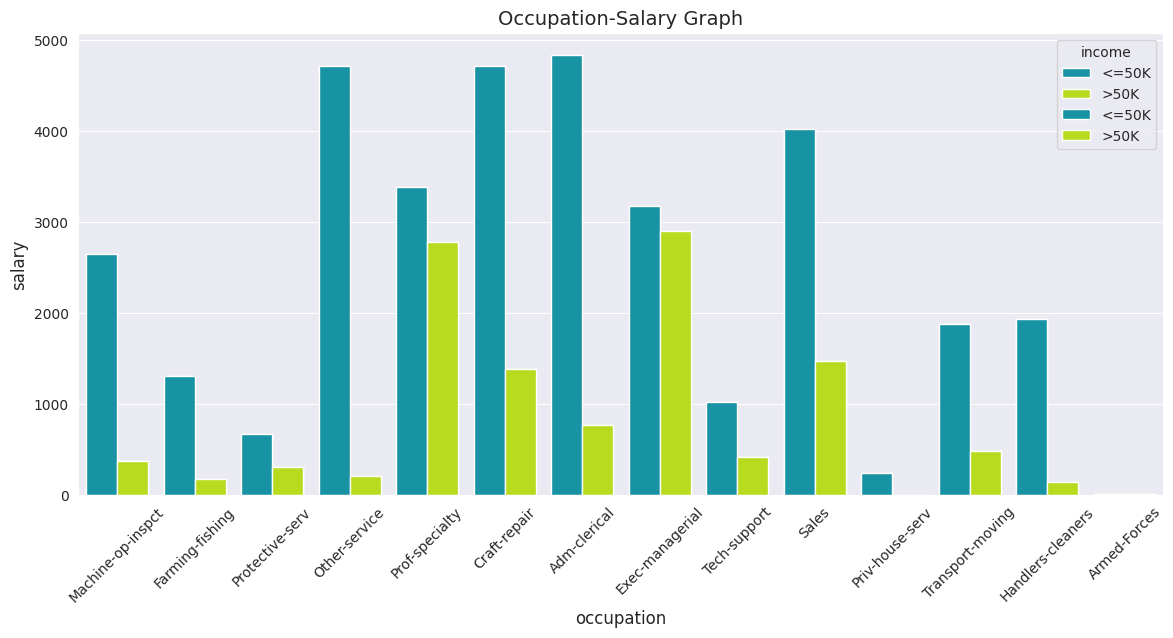

In [ ]:
plot_cat(df,'occupation','occupation','salary','Occupation-Salary Graph')

In [ ]:
#relationship based analysis
df['relationship'].value_counts()

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

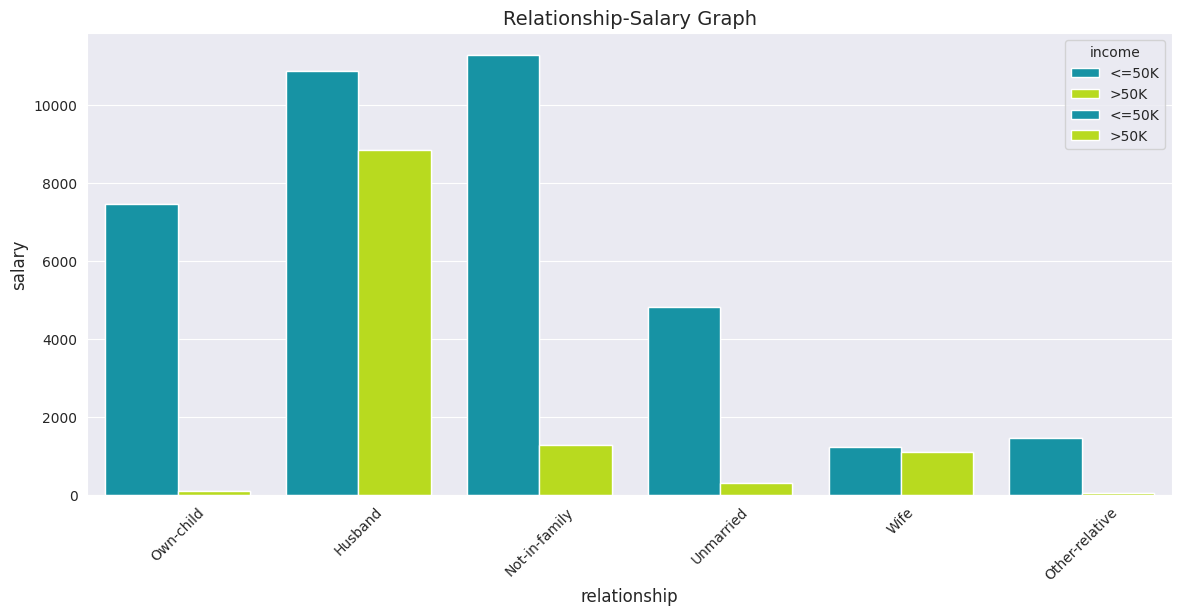

In [ ]:
plot_cat(df,'relationship','relationship','salary','Relationship-Salary Graph')

In [ ]:
#race based analysis
df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

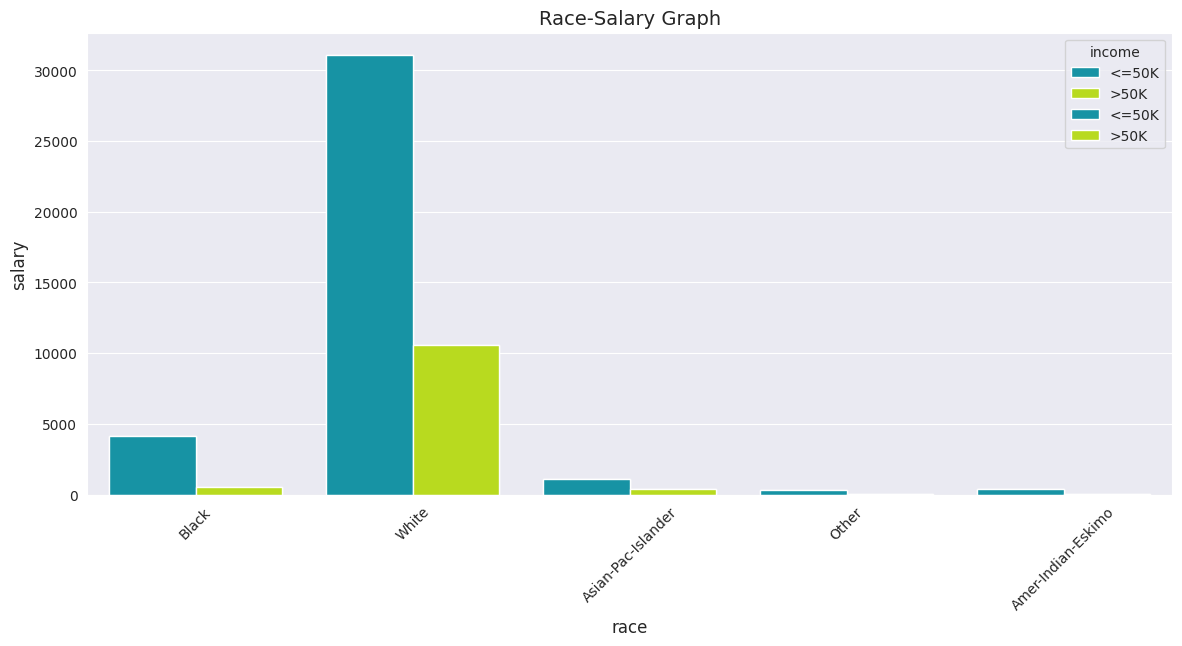

In [ ]:
plot_cat(df,'race','race','salary','Race-Salary Graph')

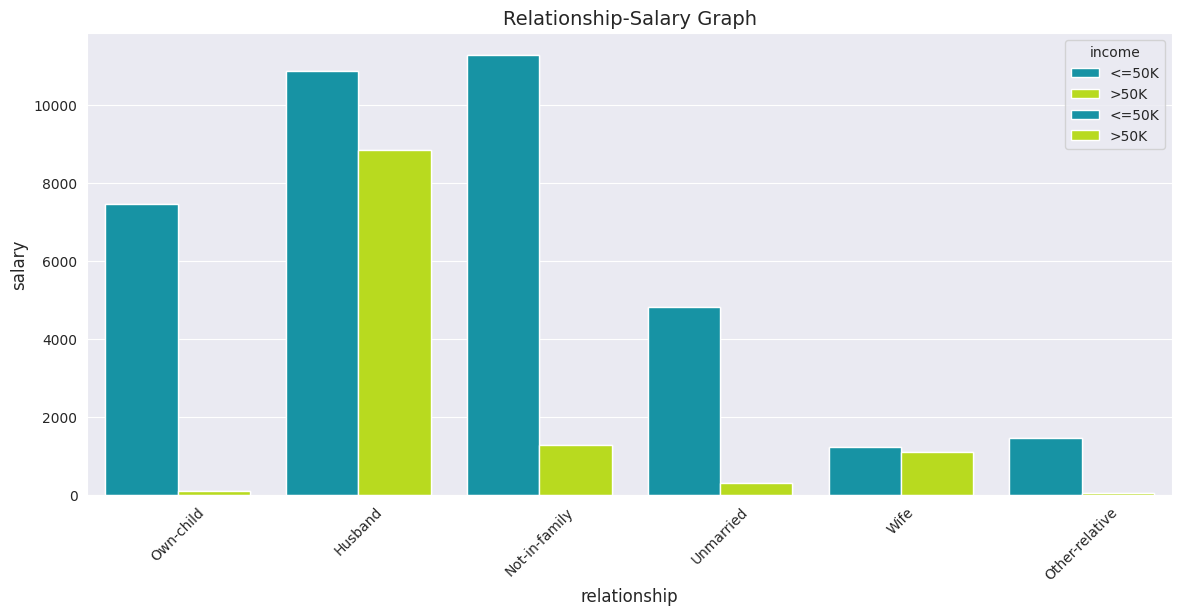

In [ ]:
#relationship based analysis
df['relationship'].value_counts()
plot_cat(df,'relationship','relationship','salary','Relationship-Salary Graph')

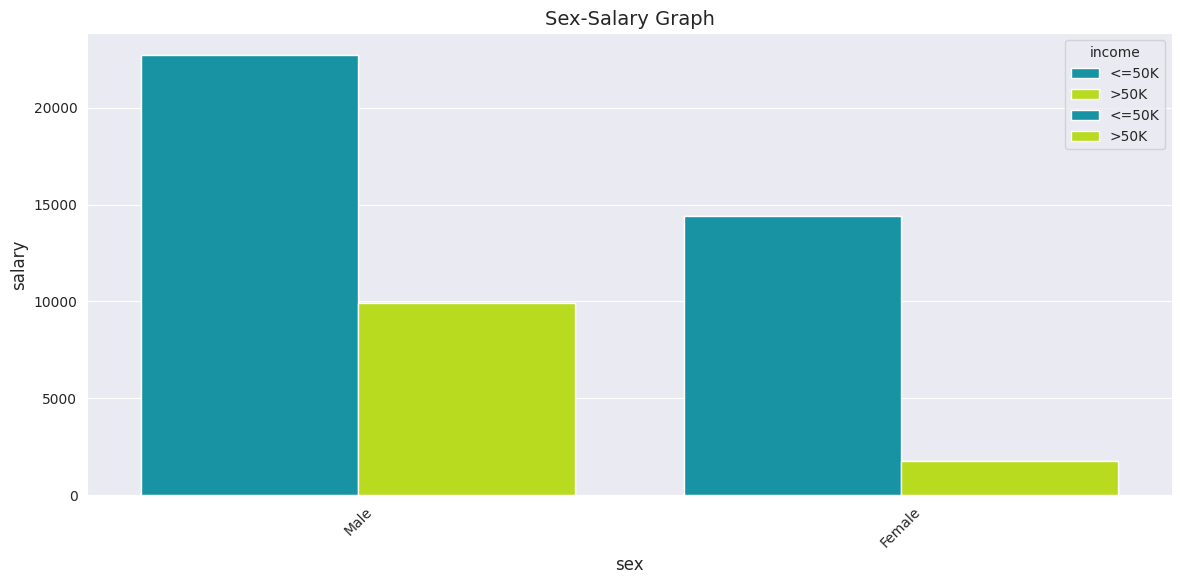

In [ ]:
#sex based analysis
df['sex'].value_counts()
plot_cat(df,'sex','sex','salary','Sex-Salary Graph')

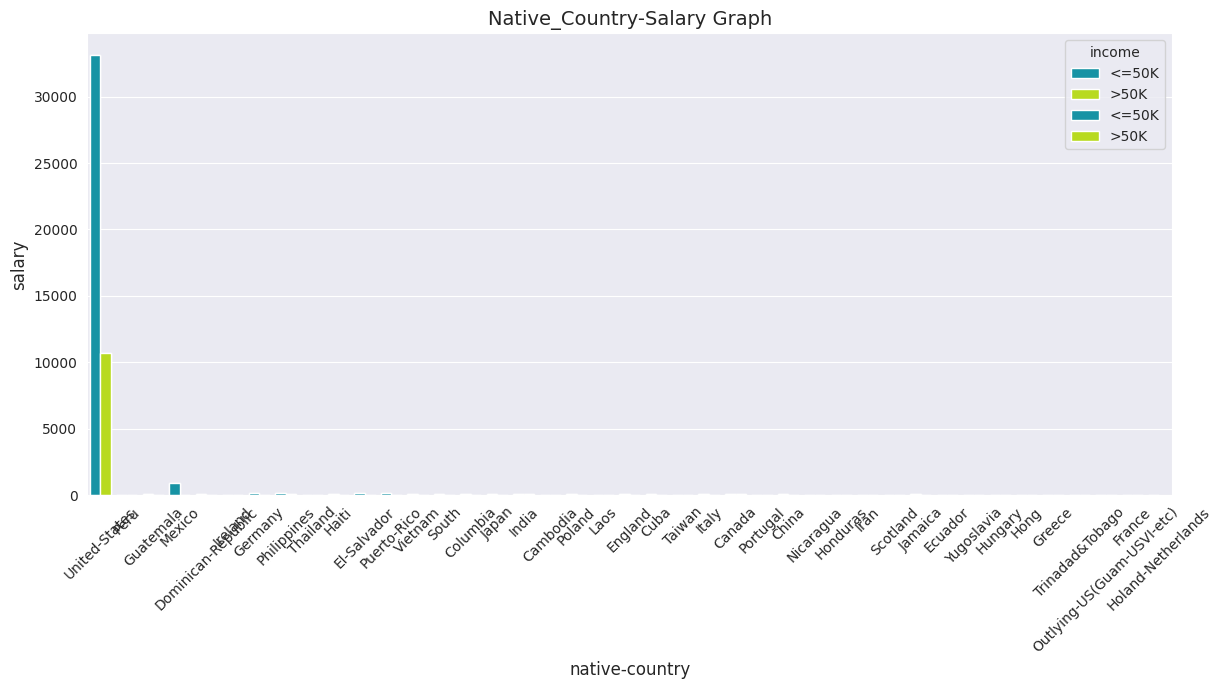

In [ ]:
#native-country based analysis
df['native-country'].value_counts()
plot_cat(df,'native-country','native-country','salary','Native_Country-Salary Graph')

###CORRELATION BETWEEN INPUT AND OUTPUT

<ipython-input-163-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

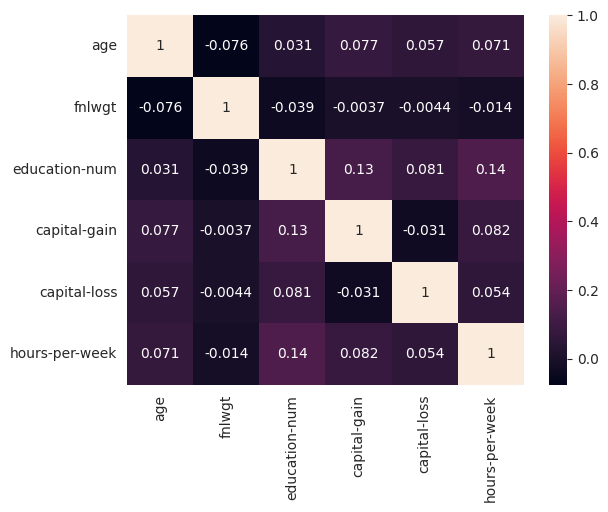

In [ ]:
sns.heatmap(df.corr(), annot=True)

##DATA PRE-PROCESSING
LABEL ENCODING()

 Grouping and encoding all the categorical columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['workclass']=lab.fit_transform(df['workclass'])
df['education']=lab.fit_transform(df['education'])
df['marital-status']=lab.fit_transform(df['marital-status'])
df['occupation']=lab.fit_transform(df['occupation'])
df['relationship']=lab.fit_transform(df['relationship'])
df['race']=lab.fit_transform(df['race'])
df['sex']=lab.fit_transform(df['sex'])
df['native-country']=lab.fit_transform(df['native-country'])
df.dtypes

age                int64
workclass          int64
fnlwgt             int64
education          int64
education-num      int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income            object
dtype: object

In [ ]:
#To generate descriptive statistics of the dataframe
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48790.000000,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,3.386145,1.896690e+05,10.287989,10.078807,2.618077,6.440992,1.443472,3.667903,0.668457,1080.217688,87.595573,40.425886,36.488010
std,13.708493,1.590010,1.056172e+05,3.874617,2.570046,1.507877,4.329715,1.602571,0.846133,0.470773,7455.905921,403.209129,12.392729,6.057139
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,1.175550e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000
50%,37.000000,3.000000,1.781385e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,48.000000,3.000000,2.376062e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


### The average and middle values of the columns are different. To handle outliers carefully, we select features before removing them from the dataset.

## FEATURE SELECTION

We are applying CHI SQUARE TEST for features with categorical(discrete) data
And applying ANNOVA TEST for features with continuous numerical dat



In [ ]:
x_discrete=df[['workclass','education','education-num','marital-status','occupation']]
x_continue=df[['age','fnlwgt','capital-gain','capital-loss','hours-per-week']]
y_copy=df.iloc[:,-1].values
y_copy

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [ ]:
#Chi Square Test for feature selection in case of discrete input labels
from sklearn.feature_selection import chi2
score1=chi2(x_discrete,y_copy)
score1
#In the output, first : f score , second : p value
#f value should be high and p value should be low

(array([ 137.3254976 ,  456.99229522, 3541.32727948, 1675.4934791 ,
           7.51493128]),
 array([1.02353958e-031, 2.16982341e-101, 0.00000000e+000, 0.00000000e+000,
        6.11896199e-003]))

In [ ]:
f_value1=pd.Series(score1[0],index=x_discrete.columns)
f_value1.sort_values(ascending=False)

education-num     3541.327279
marital-status    1675.493479
education          456.992295
workclass          137.325498
occupation           7.514931
dtype: float64

In [ ]:
p_value1=pd.Series(score1[1],index=x_discrete.columns)
p_value1.sort_values(ascending=False)

occupation         6.118962e-03
workclass          1.023540e-31
education         2.169823e-101
education-num      0.000000e+00
marital-status     0.000000e+00
dtype: float64

In [ ]:
#Chi square test : we can drop the column native-country
#Annova Test for feature selection in case of continuous input labels
from sklearn.feature_selection import f_classif
score2=f_classif(x_continue,y_copy)
score2

(array([2.72863693e+03, 1.94198550e+00, 2.55428394e+03, 1.08567740e+03,
        2.66694451e+03]),
 array([0.00000000e+000, 1.63459461e-001, 0.00000000e+000, 1.66505163e-235,
        0.00000000e+000]))

In [ ]:
f_value2=pd.Series(score2[0],index=x_continue.columns)
f_value2.sort_values(ascending=False)

age               2728.636927
hours-per-week    2666.944512
capital-gain      2554.283937
capital-loss      1085.677400
fnlwgt               1.941986
dtype: float64

### Annova test : we can drop the column fnlwgt
###From this we can see that the features which can be neglected are

native-country : From chi sqaure test

fnlwgt : From annova test

education-num : Since the columns 'education' and 'education-num' implies the same

So we can drop these three column

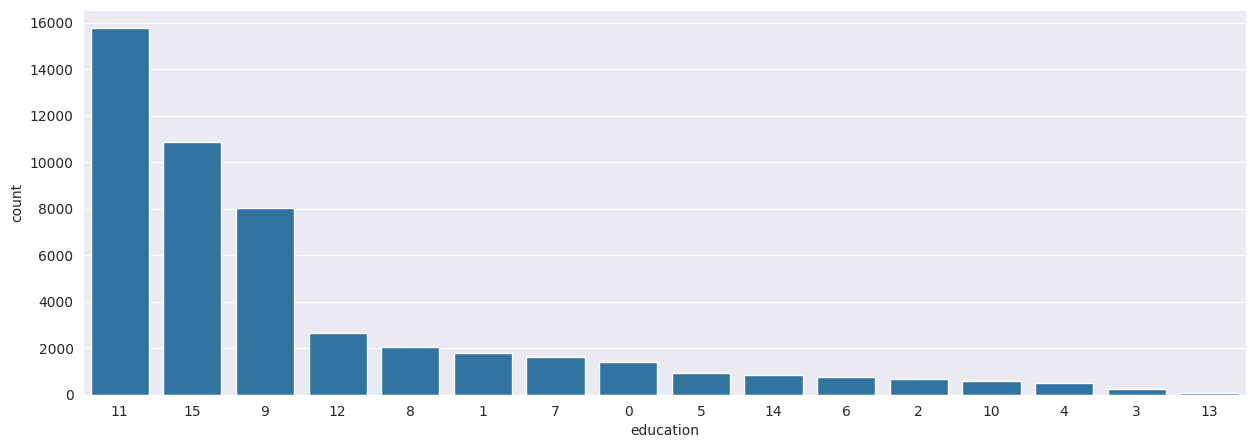

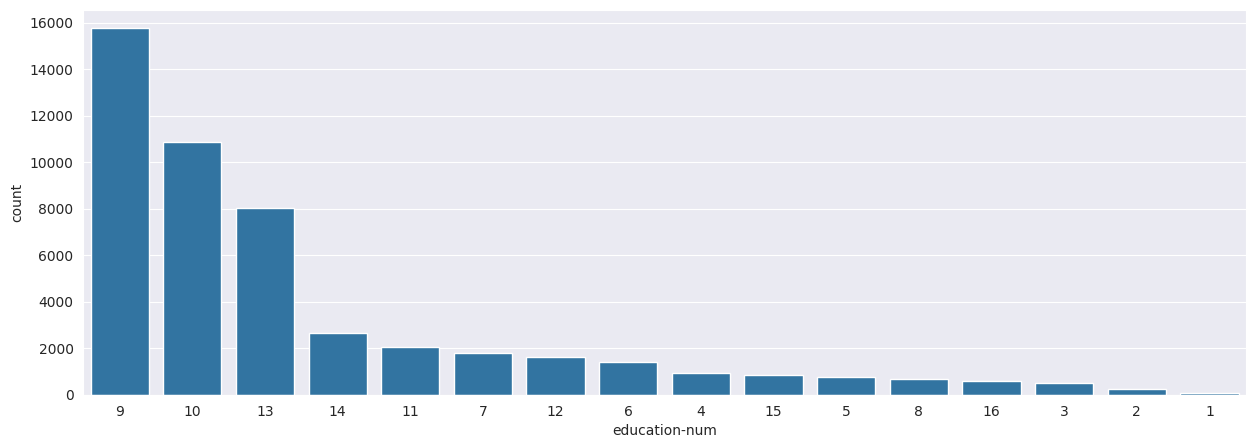

In [ ]:
edu=df[['education','education-num']]
for i in edu.columns:
  plt.figure(figsize=(15,5))
  sns.countplot(x=i,data=edu,order=edu[i].value_counts().index)

In [ ]:
#drop the above 3 unwanted columns
df.drop(['education','native-country','fnlwgt'],axis=1,inplace=True)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,25,3,7,4,6,3,2,1,0,0,40,<=50K
1,38,3,9,2,4,0,4,1,0,0,50,<=50K
2,28,1,12,2,10,0,4,1,0,0,40,>50K
3,44,3,10,2,6,0,2,1,7688,0,40,>50K
4,18,8,10,4,14,3,4,0,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,12,5,4,0,0,0,38,<=50K
48838,40,3,9,2,6,0,4,1,0,0,40,>50K
48839,58,3,9,6,0,4,4,0,0,0,40,<=50K
48840,22,3,9,4,0,3,4,1,0,0,20,<=50K


## OUTLIER DETECTION AND REMOVAL

OUTLIER : A datapoint which is significally far from other data points

IQR : Inter Quartile Range

IQR = Q3-Q1

Top = Q3+1.5*IQR

Bottom = Q1-1.5*IQR

Text(0.5, 1.0, 'Boxplot of Age')

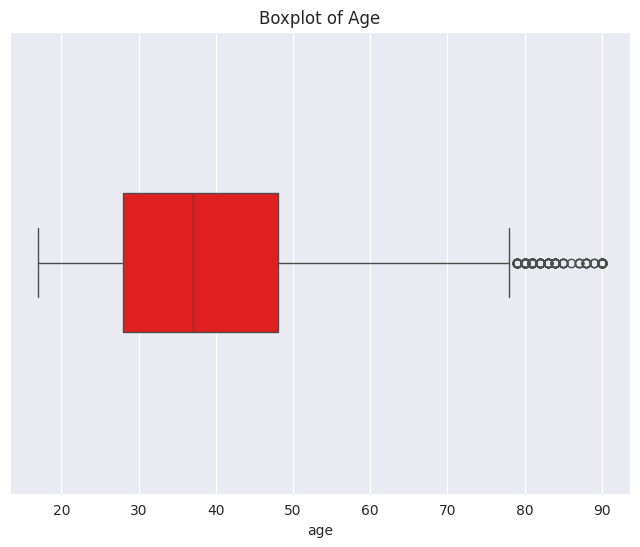

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='age',data=df,orient='h',width=0.3,color='red')
plt.title('Boxplot of Age')

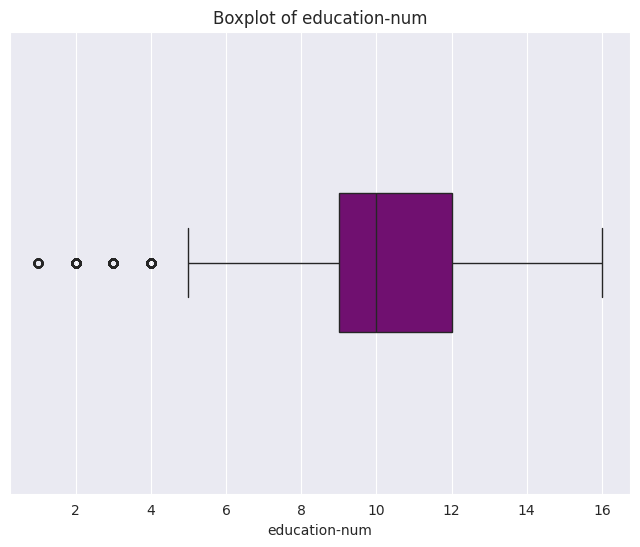

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='education-num',data=df,orient='h',width=0.3,color='purple')
plt.title('Boxplot of education-num')
plt.show()

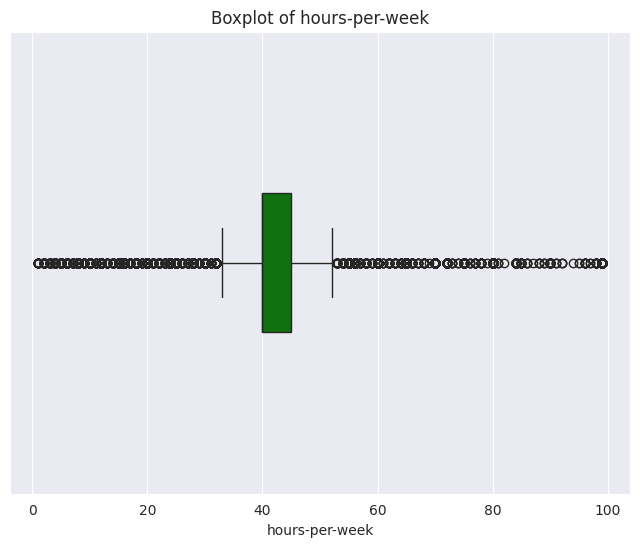

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='hours-per-week',data=df,orient='h',width=0.3,color='green')
plt.title('Boxplot of hours-per-week')
plt.show()

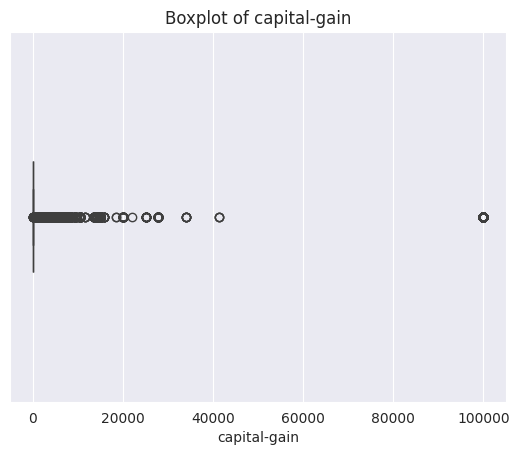

In [ ]:
sns.boxplot(x='capital-gain',data=df,orient='h',width=0.3)
plt.title('Boxplot of capital-gain')
plt.show()

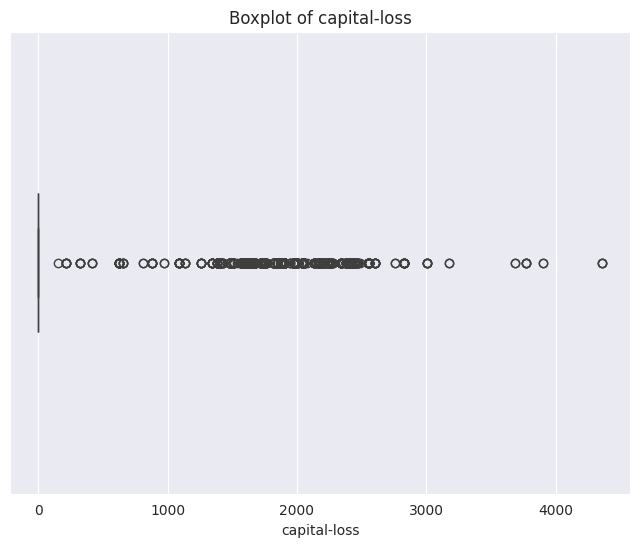

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='capital-loss',data=df,orient='h',width=0.3)
plt.title('Boxplot of capital-loss')
plt.show()

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
threshold=1.5
df=df[~((df<(Q1-threshold*IQR)) | (df>(Q3+threshold*IQR))).any(axis=1)]
df

<ipython-input-179-467f7a1cc470>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
<ipython-input-179-467f7a1cc470>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)
<ipython-input-179-467f7a1cc470>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-threshold*IQR)) | (df>(Q3+threshold*IQR))).any(axis=1)]


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
1,38,3,9,2,4,0,4,1,0,0,50,<=50K
8,24,3,10,4,7,4,4,0,0,0,40,<=50K
12,26,3,9,4,0,1,4,0,0,0,39,<=50K
15,43,3,14,2,3,0,4,1,0,0,50,>50K
20,34,3,13,2,12,0,4,1,0,0,47,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,3,14,2,3,0,4,1,0,0,40,>50K
48836,22,3,10,4,10,1,4,1,0,0,40,<=50K
48837,27,3,12,2,12,5,4,0,0,0,38,<=50K
48838,40,3,9,2,6,0,4,1,0,0,40,>50K


### We are aware that our dataset exhibits an imbalance.

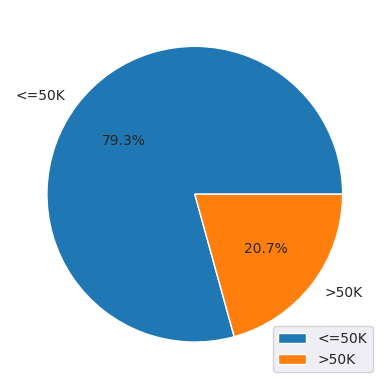

In [ ]:
salary_count=df['income'].value_counts()
lc=salary_count.index
plt.pie(salary_count,labels=lc,autopct='%1.1f%%')
plt.legend(loc='lower right')

### SEPERATE X AS INPUT VARIABLE AND Y AS OUTPUT VARIABLE

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

1        <=50K
8        <=50K
12       <=50K
15        >50K
20        >50K
         ...  
48835     >50K
48836    <=50K
48837    <=50K
48838     >50K
48839    <=50K
Name: income, Length: 18111, dtype: object

## BALANCING THE DATASET

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)
y_resampled.value_counts()


<=50K    14361
>50K     14361
Name: income, dtype: int64

In [ ]:
from collections import Counter
print("Before Smote :",Counter(y))
print("After Smote :",Counter(y_resampled))

Before Smote : Counter({'<=50K': 14361, '>50K': 3750})
After Smote : Counter({'<=50K': 14361, '>50K': 14361})


## TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30)
x_train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
7751,55,3,13,2,11,0,4,1,0,0,40
6345,53,3,10,2,12,0,4,1,0,0,40
9130,43,3,13,0,0,1,4,0,0,0,40
14564,24,3,9,4,11,3,4,1,0,0,40
17235,24,3,13,2,9,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
13247,33,3,9,2,6,0,4,1,0,0,40
13432,39,3,9,2,13,0,4,1,0,0,50
12947,32,3,12,0,0,4,4,0,0,0,40
3027,18,3,7,4,2,3,4,1,0,0,40


In [ ]:
x_test

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
19494,62,3,9,2,3,0,4,1,0,0,40
26325,50,3,10,1,9,0,4,1,0,0,45
20124,34,3,10,2,2,0,4,1,0,0,48
24585,38,3,14,2,9,0,4,1,0,0,40
2681,36,3,6,0,2,4,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
12584,64,3,6,2,0,0,4,1,0,0,40
11057,40,3,13,4,9,1,4,0,0,0,45
25462,36,3,13,2,9,0,4,1,0,0,45
14345,32,3,9,2,2,0,4,1,0,0,48


In [ ]:
y_train

7751     <=50K
6345     <=50K
9130     <=50K
14564    <=50K
17235    <=50K
         ...  
13247    <=50K
13432     >50K
12947    <=50K
3027     <=50K
16015     >50K
Name: income, Length: 20105, dtype: object

In [ ]:
y_test

19494     >50K
26325     >50K
20124     >50K
24585     >50K
2681     <=50K
         ...  
12584    <=50K
11057    <=50K
25462     >50K
14345    <=50K
13619    <=50K
Name: income, Length: 8617, dtype: object

## Normalization

STANDARDSCALER
* 1 normalizing training data(x_train)
* 2 normalizing testing data(x_test)

* Normalization in machine learning is the process of translating the data into the range
[0,1] (or any other range)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## **Select parameters using model creation**



*  gridsearchcv



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
clf=GridSearchCV(model,param,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


## **MODEL CREATION**
using algorithms
  * 1 .K Nearest Neighbors
  * 2 .Naive Bayes
  * 3 .Support Vector Machine
  * 4 .decisiontree
  * 5 .LogisticReggression


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
knn=KNeighborsClassifier(n_neighbors=3,weights='uniform')
naiv=BernoulliNB()
svm=SVC()
tree=DecisionTreeClassifier(criterion='entropy')
regn=LogisticRegression(penalty='l2')
lst=[knn,naiv,svm,tree,regn]

## **PERFOMANCE EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for j in lst:
  print(j)
  print('_'*100)
  j.fit(x_train,y_train)
  y_pred=j.predict(x_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=3)
____________________________________________________________________________________________________
0.8270859928049205
[[3376  950]
 [ 540 3751]]
              precision    recall  f1-score   support

       <=50K       0.86      0.78      0.82      4326
        >50K       0.80      0.87      0.83      4291

    accuracy                           0.83      8617
   macro avg       0.83      0.83      0.83      8617
weighted avg       0.83      0.83      0.83      8617

BernoulliNB()
____________________________________________________________________________________________________
0.738075896483695
[[2893 1433]
 [ 824 3467]]
              precision    recall  f1-score   support

       <=50K       0.78      0.67      0.72      4326
        >50K       0.71      0.81      0.75      4291

    accuracy                           0.74      8617
   macro avg       0.74      0.74      0.74      8617
weighted avg       0.74      0.74      0.74      8617

SVC

## **DISPLAY CONFUSION MATRIX USING CONFUSIONMATRIXDISPLAY**

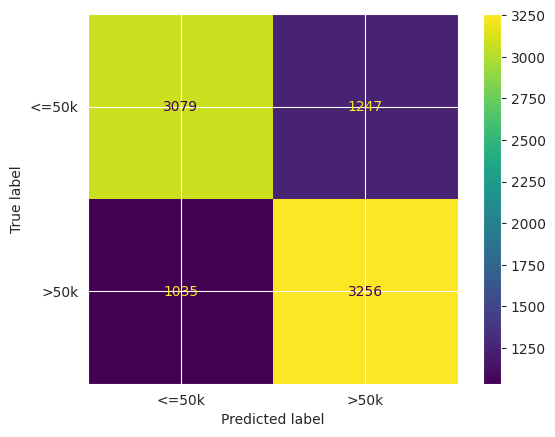

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
label = ['<=50k', '>50k']
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

## **The kneighbours classifier stands out as the top-performing model, achieving the highest accuracy score.**